In [1]:
# Import Modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import Data
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
# Get DataFrame information (data types, non-null counts, and memory usage)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Check data quality
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


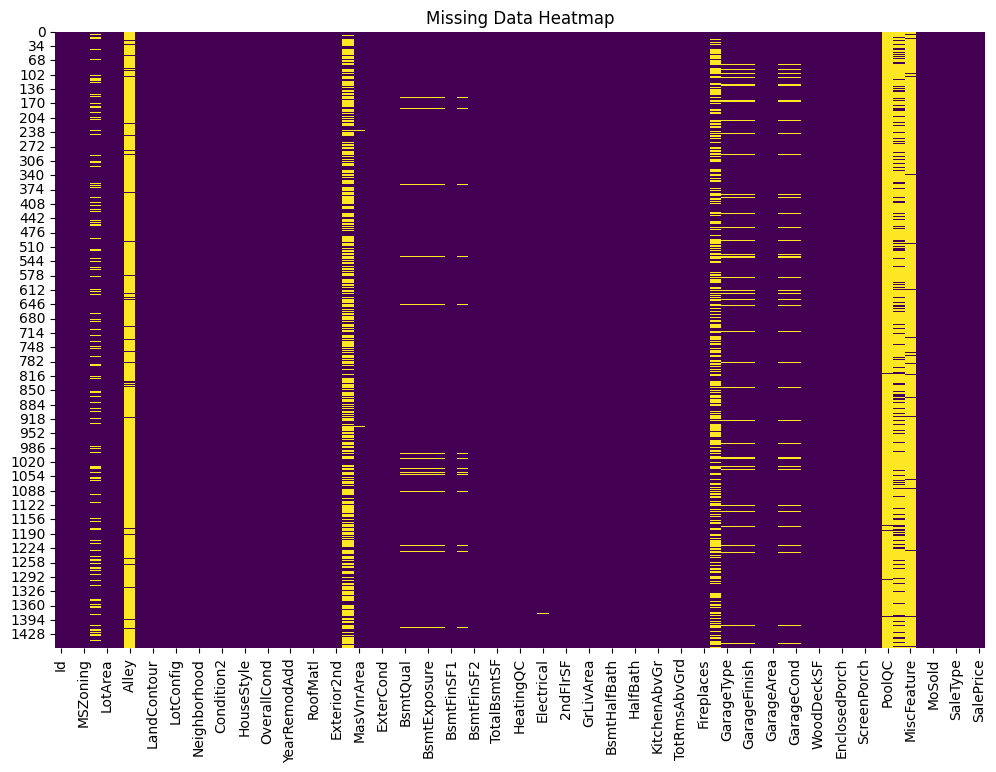

In [6]:
# Visualization: Missing Data Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
# Check for columns with more than 100 missing values and drop them
columns_to_drop = missing_values[missing_values > 100].index
train = train.drop(columns=columns_to_drop)

# print the columns that were dropped
print(f"Columns dropped: {list(columns_to_drop)}")

Columns dropped: ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [45]:
#how many columns are left in the DataFrame after dropping those with more than 100 missing values
# Check for columns with more than 100 missing values and drop them
missing_values = train.isnull().sum()  # Calculate the number of missing values per column
columns_to_drop = missing_values[missing_values > 100].index
train = train.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped: {list(columns_to_drop)}")

# Check how many columns are left
remaining_columns = train.shape[1]
print(f"Number of columns remaining: {remaining_columns}")


Columns dropped: []
Number of columns remaining: 78


In [9]:
# Print the names of the columns
print("Columns in the DataFrame:")
print(train.columns.tolist())

Columns in the DataFrame:
['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Sal

In [10]:
# Check the number of columns in the DataFrame
num_columns = train.shape[1]
print(f"The DataFrame has {num_columns} columns.")


The DataFrame has 74 columns.


In [11]:
# Encode the categorical data to be numerical
label_encoder = LabelEncoder()

# Automatically identify categorical columns
categorical_columns = train.select_dtypes(include=['object', 'category']).columns

# Apply label encoding to categorical columns
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col].astype(str))

# Optional: print the list of encoded categorical columns
print(f"Encoded categorical columns: {list(categorical_columns)}")

Encoded categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [12]:
# Handling Missing Data: inpute missing values using the median
train.fillna(train.median(), inplace=True)

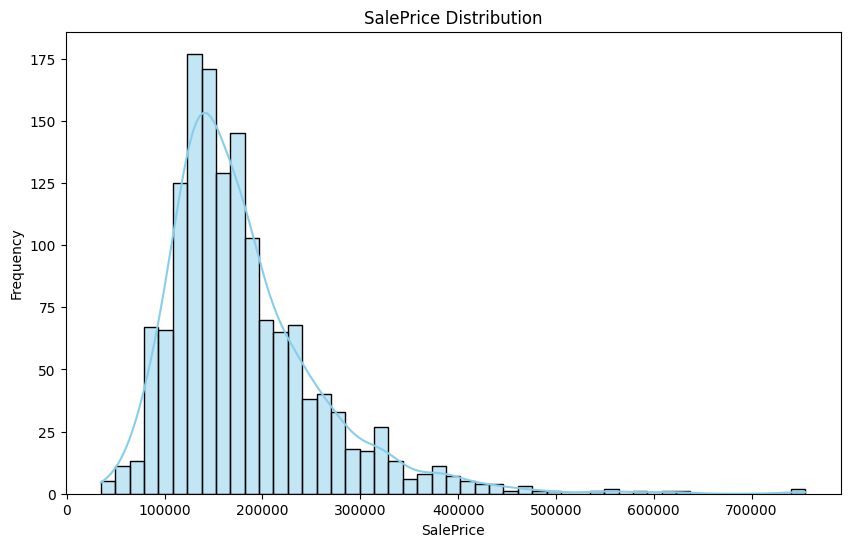

In [13]:
# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color="skyblue")
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [14]:
#Categorization of features
# Example categorization

# Define the categories and their respective features
categories = {
    "General Information": ["Id", "MSSubClass", "MSZoning", "Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd"],
    "Lot Details": ["LotArea", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope"],
    "Condition/Style": ["Condition1", "Condition2", "BldgType", "HouseStyle"],
    "Roof and Exterior": ["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond"],
    "Masonry/Structural Details": ["MasVnrArea", "Foundation"],
    "Basement": ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2",
                 "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"],
    "Heating/Cooling": ["Heating", "HeatingQC", "CentralAir", "Electrical"],
    "Areas": ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea"],
    "Bedroom, Bathroom, Kitchen": ["BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "FullBath", "HalfBath", "TotRmsAbvGrd"],
    "Functional Features": ["Functional", "Fireplaces"],
    "Garage": ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"],
    "Drive/Deck/Porch/Pool": ["PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"],
    "Miscellaneous Features": ["MiscVal"],
    "Date": ["MoSold", "YrSold"],
    "Sale Information": ["SaleType", "SaleCondition", "SalePrice"]
}

# Check for uncategorized features
all_features = sum(categories.values(), [])  # Flatten the list of categorized features
uncategorized_features = [col for col in train.columns if col not in all_features]

# Print uncategorized features if any
if uncategorized_features:
    print("Uncategorized features:", uncategorized_features)
else:
    print("All features categorized!")

# Verify the total number of variables matches the DataFrame columns
total_features = len(all_features)
print(f"Total number of variables categorized: {total_features}")
print(f"Number of columns in the DataFrame: {train.shape[1]}")

# Check if the totals match
if total_features == train.shape[1]:
    print("All variables are accounted for!")
else:
    print("Mismatch! Some variables may be missing or duplicated.")


All features categorized!
Total number of variables categorized: 74
Number of columns in the DataFrame: 74
All variables are accounted for!


In [15]:
# Check the range of years in the dataset
year_range = train['YrSold'].min(), train['YrSold'].max()
print(f"The data covers the years from {year_range[0]} to {year_range[1]}.")


The data covers the years from 2006 to 2010.


In [16]:
#import pandas as pd

# Assume 'train' is your DataFrame
# Calculate descriptive statistics for the YrSold column
yrsold_stats = train['YrSold'].describe()

# Display the statistics for the 'YrSold' column as a DataFrame
yrsold_stats_df = pd.DataFrame(yrsold_stats).rename(columns={'YrSold': 'Value'})
yrsold_stats_df.reset_index(inplace=True)
yrsold_stats_df.rename(columns={'index': 'Statistic'}, inplace=True)

# Display the DataFrame with statistics
print(yrsold_stats_df)


  Statistic        Value
0     count  1460.000000
1      mean  2007.815753
2       std     1.328095
3       min  2006.000000
4       25%  2007.000000
5       50%  2008.000000
6       75%  2009.000000
7       max  2010.000000


<ipython-input-17-854a130fad51>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


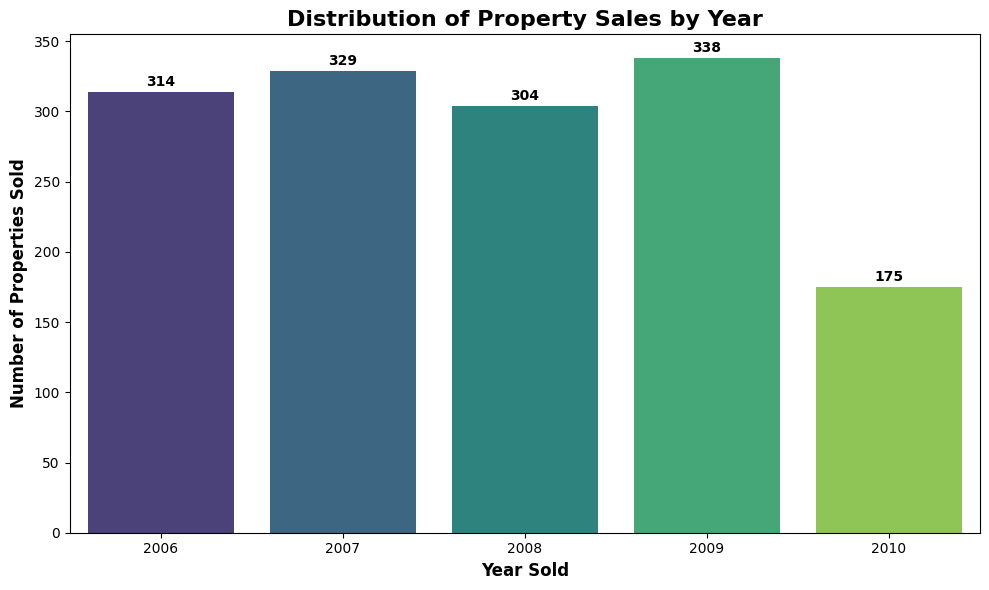

In [17]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Assume train['YrSold'] contains the years from the dataset
# Count the number of rows per year
year_counts = train['YrSold'].value_counts().sort_index()

# Create a bar plot for the number of rows per year
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Year Sold", fontsize=12, fontweight='bold')
plt.ylabel("Number of Properties Sold", fontsize=12, fontweight='bold')
plt.title("Distribution of Property Sales by Year", fontsize=16, fontweight='bold')

# Annotate each bar with the count
for i, value in enumerate(year_counts.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontweight='bold')

# Display the graph
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


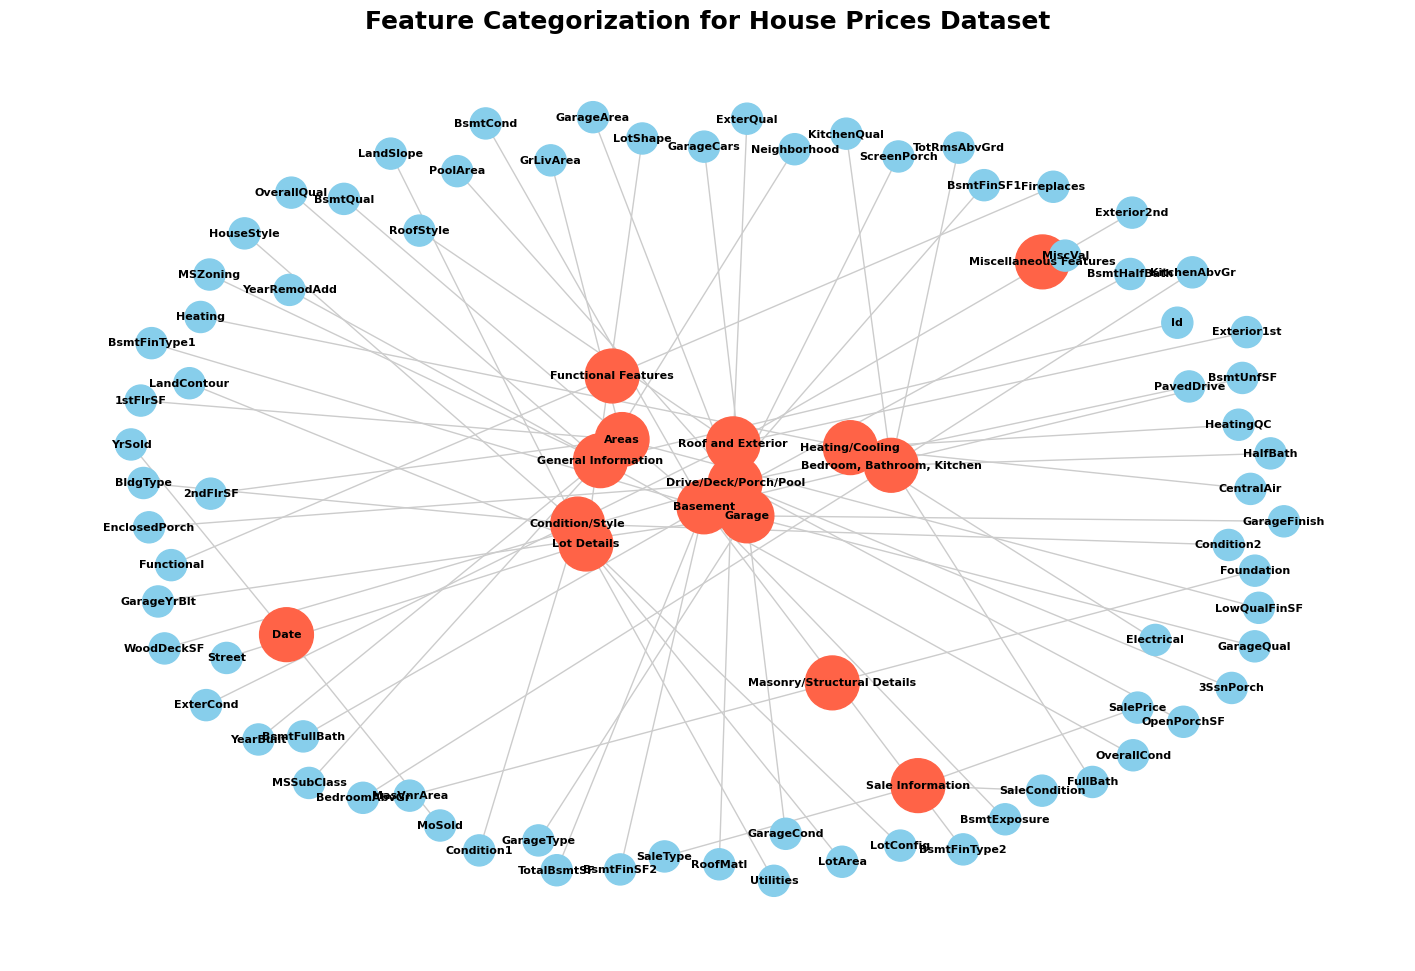

In [18]:
#Visualizing the feature categoriuzation and features
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Define the categories and their respective features
categories = {
    "General Information": ["Id", "MSSubClass", "MSZoning", "Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd"],
    "Lot Details": ["LotArea", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope"],
    "Condition/Style": ["Condition1", "Condition2", "BldgType", "HouseStyle"],
    "Roof and Exterior": ["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond"],
    "Masonry/Structural Details": ["MasVnrArea", "Foundation"],
    "Basement": ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2",
                 "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"],
    "Heating/Cooling": ["Heating", "HeatingQC", "CentralAir", "Electrical"],
    "Areas": ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea"],
    "Bedroom, Bathroom, Kitchen": ["BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "FullBath", "HalfBath", "TotRmsAbvGrd"],
    "Functional Features": ["Functional", "Fireplaces"],
    "Garage": ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"],
    "Drive/Deck/Porch/Pool": ["PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"],
    "Miscellaneous Features": ["MiscVal"],
    "Date": ["MoSold", "YrSold"],
    "Sale Information": ["SaleType", "SaleCondition", "SalePrice"]
}

# Step 2: Create a directed graph object
G = nx.DiGraph()

# Step 3: Add nodes and edges for each category and its features
for category, features in categories.items():
    # Add category node (parent node)
    G.add_node(category, color='#FF6347', size=1500)  # Category node (red-orange)
    for feature in features:
        G.add_node(feature, color='#87CEEB', size=500)  # Feature node (sky blue)
        G.add_edge(category, feature)  # Create a connection between category and feature

# Step 4: Set position for nodes using a spring layout for better visualization
pos = nx.spring_layout(G, seed=42)  # Set seed for consistent layout

# Step 5: Extract node attributes for colors and sizes
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]

# Step 6: Draw the graph
plt.figure(figsize=(18, 12))  # Size of the graph
nx.draw_networkx(
    G, pos,
    node_color=node_colors,  # Color of the nodes
    node_size=node_sizes,  # Size of the nodes
    edge_color='#cccccc',  # Color of the edges
    font_size=8,  # Size of the text
    font_weight='bold',  # Bold font
    with_labels=True,  # Show labels
    arrows=False  # No arrows since the relationship is not directional
)

# Step 7: Add a title and display the graph
plt.title("Feature Categorization for House Prices Dataset", fontsize=18, fontweight='bold')
plt.axis('off')  # Turn off the axis
plt.show()


In [19]:
# Feature Engineering
# 1. Age at Sale
train['AgeAtSale'] = train['YrSold'] - train['YearBuilt']
train['YearsSinceRemodel'] = train['YrSold'] - train['YearRemodAdd']

# 2. Total Bathrooms
train['TotalBaths'] = train['FullBath'] + train['HalfBath'] * 0.5 + train['BsmtFullBath'] + train['BsmtHalfBath'] * 0.5

# 3. Total Porch Area
train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

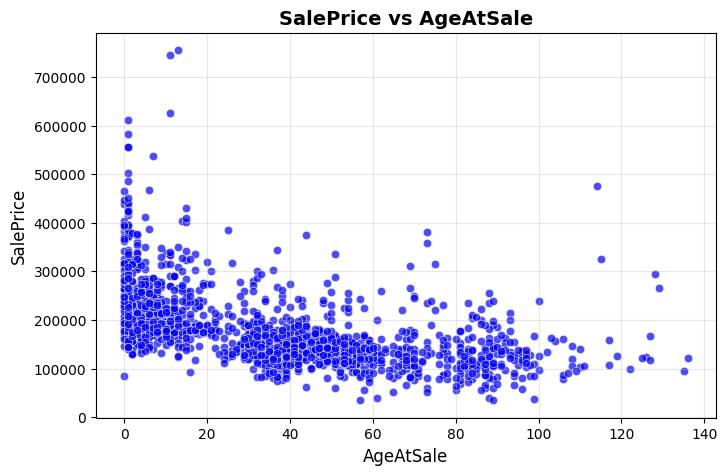

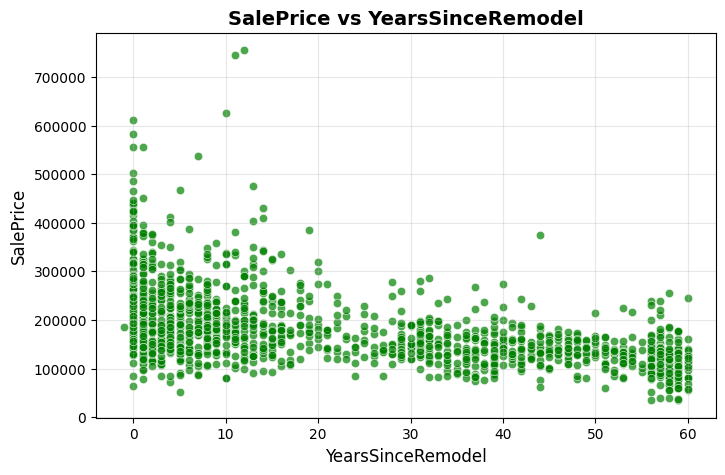

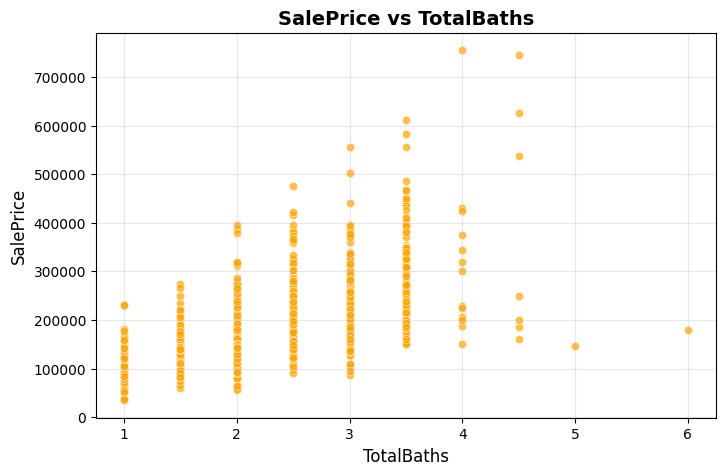

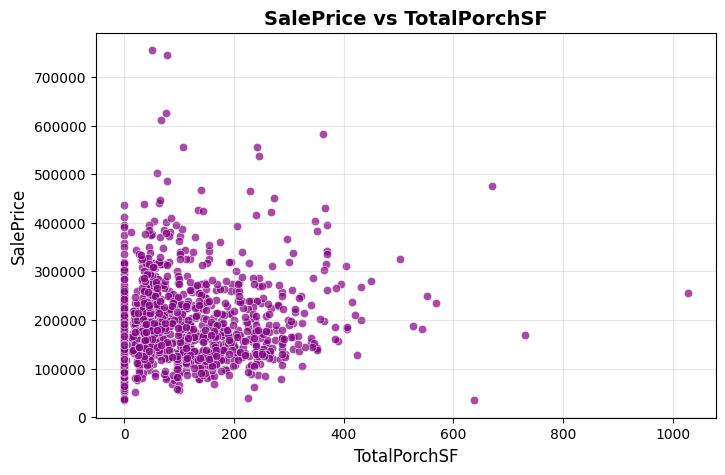

In [20]:
#Plot each engineered feature againts Sale Price
# Scatterplots with different colors for each engineered feature
import matplotlib.pyplot as plt
import seaborn as sns

# Define different colors for each plot
colors = ['blue', 'green', 'orange', 'purple']
engineered_features = ['AgeAtSale', 'YearsSinceRemodel', 'TotalBaths', 'TotalPorchSF']

# Loop through features and plot
for feature, color in zip(engineered_features, colors):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train[feature], y=train['SalePrice'], alpha=0.7, color=color)
    plt.title(f'SalePrice vs {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()



In [21]:
# Calculate the correlation of each feature with SalePrice
correlation_with_target = train.corr()['SalePrice'].sort_values(ascending=False)

# Display the top 10 features most correlated with SalePrice
print('Top 10 features most correlated with SalePrice:')
print(correlation_with_target.head(20))


Top 10 features most correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
TotalBaths      0.631731
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Foundation      0.382479
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


In [22]:
# Define Features and Target -> Used the top 10 most important features as well as the engineered features
X = train[['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'GarageArea',
 'GarageCars',
 'Neighborhood',
  # Engineered features
  'AgeAtSale',
  'YearsSinceRemodel',
  'TotalBaths',
  'TotalPorchSF']]  # Dropping Id and SalePrice (target variable)
y = train['SalePrice']

In [23]:
# Split Data into training and validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [24]:
# Train the Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Evalute the Random Forest Model
y_pred = rf.predict(X_valid)

# RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse}")

# R²
r2 = r2_score(y_valid, y_pred)
print(f"R²: {r2}")

# Explained Variance Score
evs = explained_variance_score(y_valid, y_pred)
print(f"Explained Variance Score: {evs}")

RMSE: 26713.915137521115
R²: 0.9069618106585867
Explained Variance Score: 0.9070178223755883


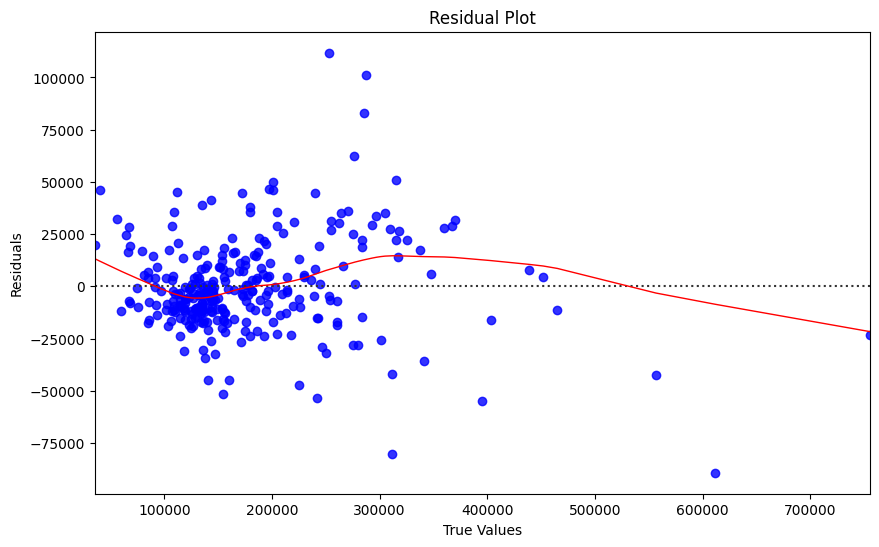

In [26]:
# Visualize the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_valid, y=y_pred, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

In [27]:
# Figure out which feature were the most important
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=["Importance"])
feature_importances.sort_values(by="Importance", ascending=False).head(10)

,Importance
OverallQual,0.564647
GrLivArea,0.131615
TotalBsmtSF,0.043705
2ndFlrSF,0.040837
BsmtFinSF1,0.036858
1stFlrSF,0.034857
LotArea,0.026630
GarageArea,0.023939
AgeAtSale,0.021274
TotalBaths,0.019601


<Figure size 1000x600 with 0 Axes>

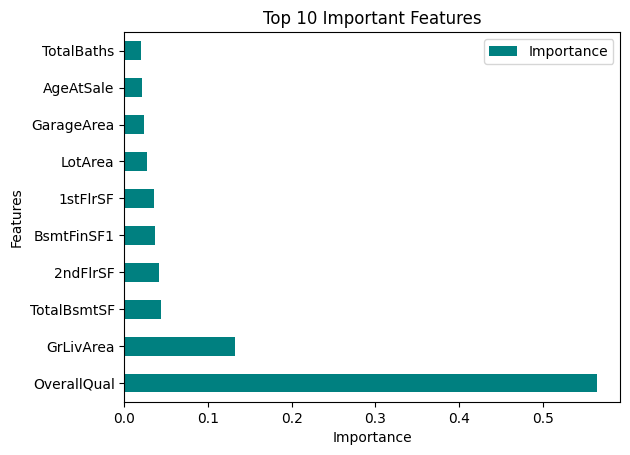

In [28]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
feature_importances.sort_values(by="Importance", ascending=False).head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [29]:
#Compare to XG BOOST
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Split data into training and validation sets (if not already split)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Evaluate Random Forest
rmse_rf = mean_squared_error(y_valid, y_pred_rf, squared=False)
r2_rf = r2_score(y_valid, y_pred_rf)

# Train XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_valid)

# Evaluate XGBoost
rmse_xgb = mean_squared_error(y_valid, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_valid, y_pred_xgb)

# Explained Variance Score
evs_xgb = explained_variance_score(y_valid, y_pred_xgb)
print(f"Explained Variance Score: {evs_xgb}")

# Print Results
print("Random Forest:")
print(f"RMSE: {rmse_rf}")
print(f"R² Score: {r2_rf}")

print("\nXGBoost:")
print(f"RMSE: {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

# Explained Variance Score
evs_xgb = explained_variance_score(y_valid, y_pred_xgb)
print(f"Explained Variance Score: {evs_xgb}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Explained Variance Score: 0.9123511431665478
Random Forest:
RMSE: 26713.915137521115
R² Score: 0.9069618106585867

XGBoost:
RMSE: 25928.78067881838
R² Score: 0.9123502969741821
Explained Variance Score: 0.9123511431665478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


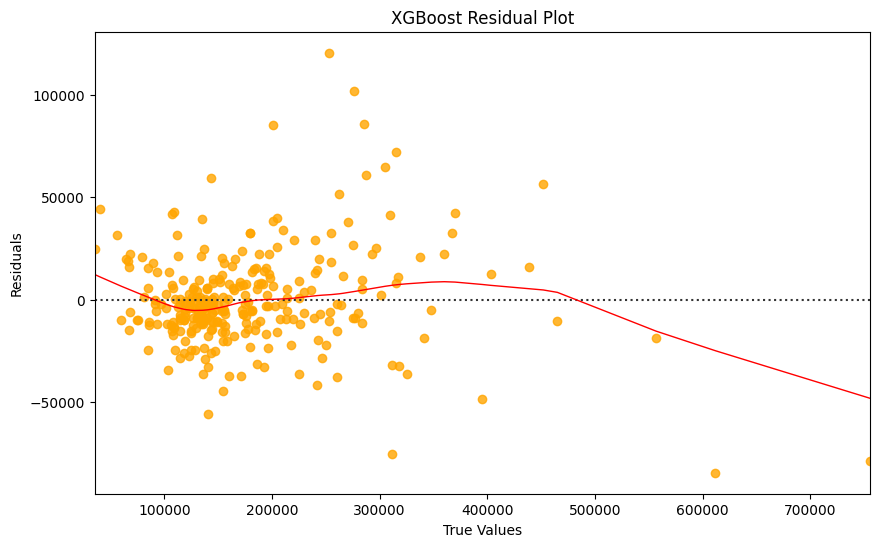

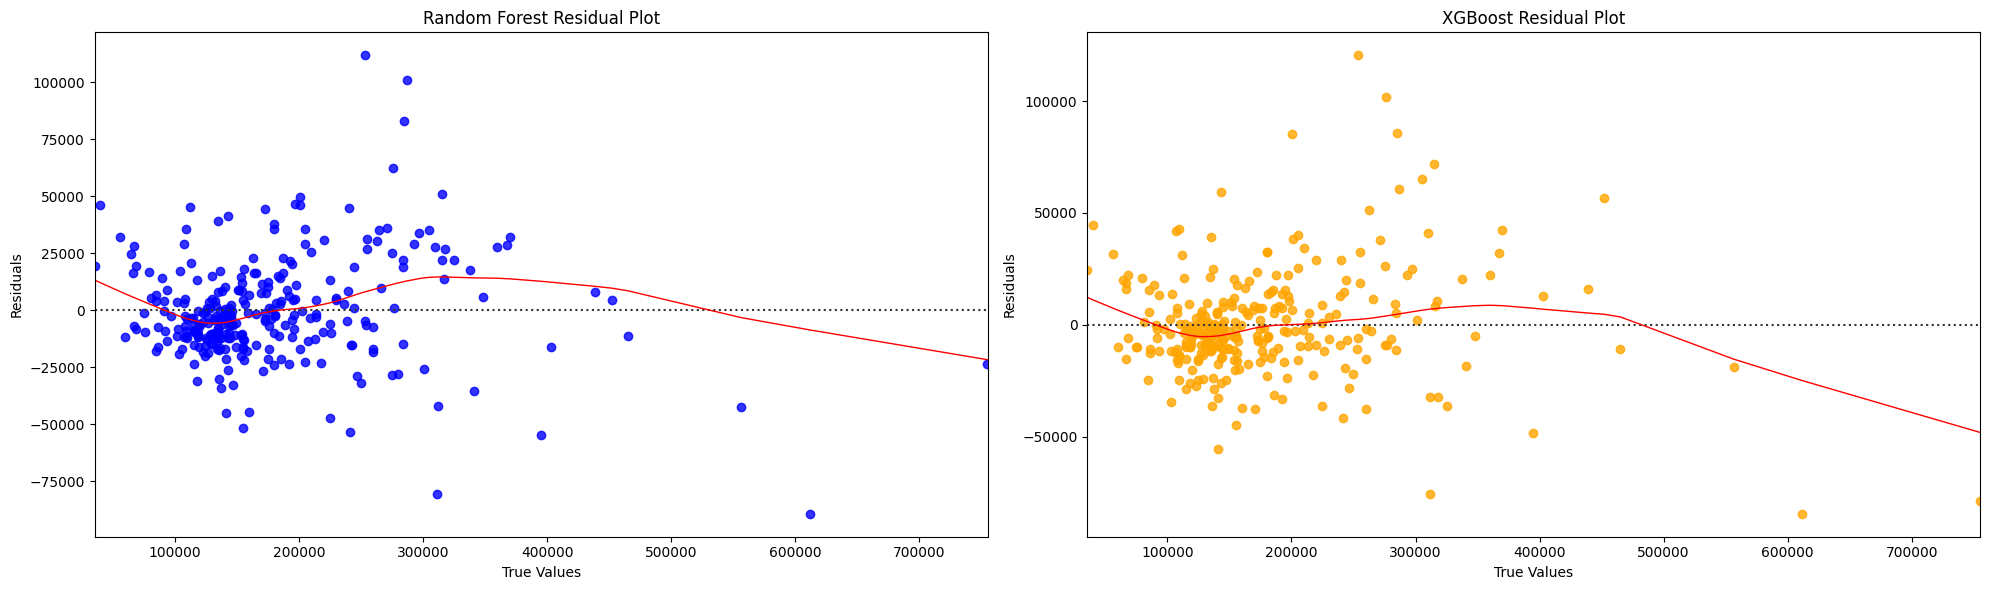

In [30]:
#---Plotting XGBoost residual values:

# Visualize the XGBoost residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_valid, y=y_pred_xgb, lowess=True, color="orange", line_kws={'color': 'red', 'lw': 1})
plt.title("XGBoost Residual Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# If you want to compare both models side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Random Forest residuals
sns.residplot(x=y_valid, y=y_pred_rf, lowess=True, color="blue",
             line_kws={'color': 'red', 'lw': 1}, ax=ax1)
ax1.set_title("Random Forest Residual Plot")
ax1.set_xlabel("True Values")
ax1.set_ylabel("Residuals")

# XGBoost residuals
sns.residplot(x=y_valid, y=y_pred_xgb, lowess=True, color="orange",
             line_kws={'color': 'red', 'lw': 1}, ax=ax2)
ax2.set_title("XGBoost Residual Plot")
ax2.set_xlabel("True Values")
ax2.set_ylabel("Residuals")

plt.tight_layout()
plt.show()

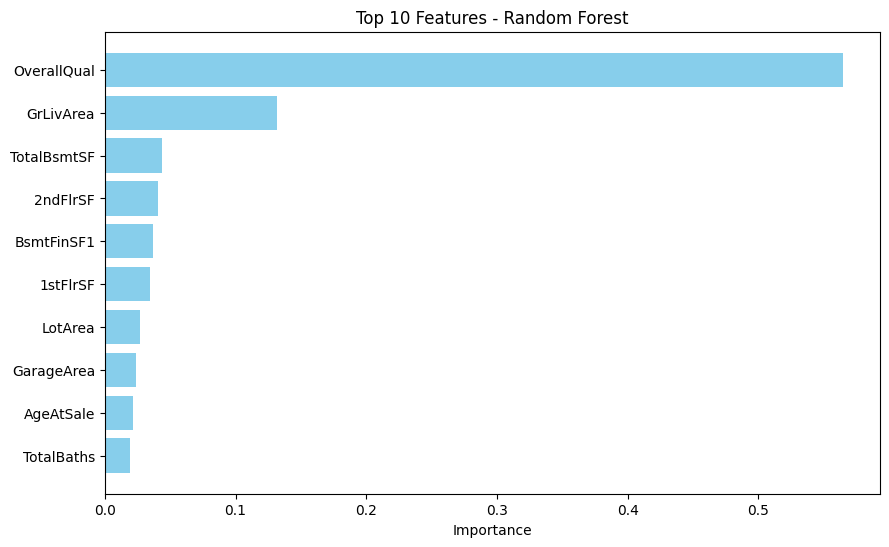

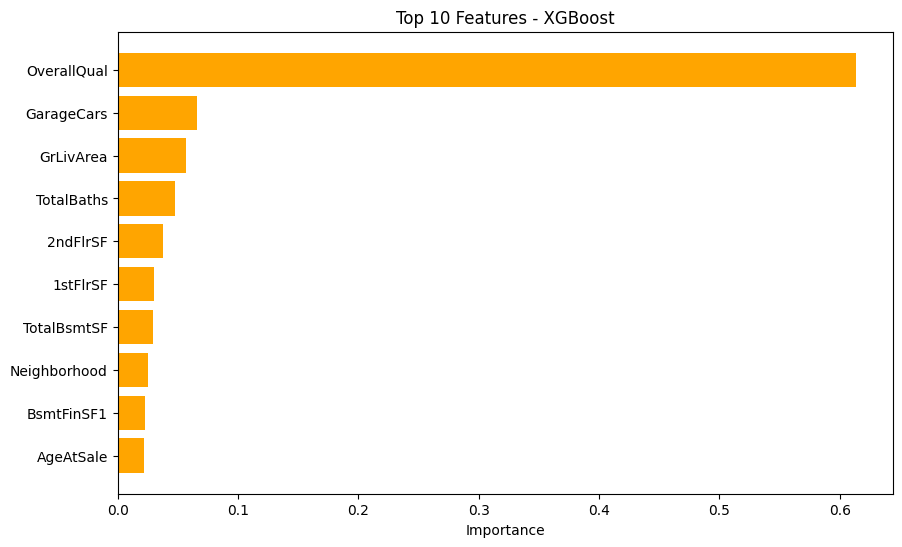

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest Feature Importance
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# XGBoost Feature Importance
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot RF Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importances['Feature'][:10], rf_importances['Importance'][:10], color='skyblue')
plt.title("Top 10 Features - Random Forest")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importances['Feature'][:10], xgb_importances['Importance'][:10], color='orange')
plt.title("Top 10 Features - XGBoost")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


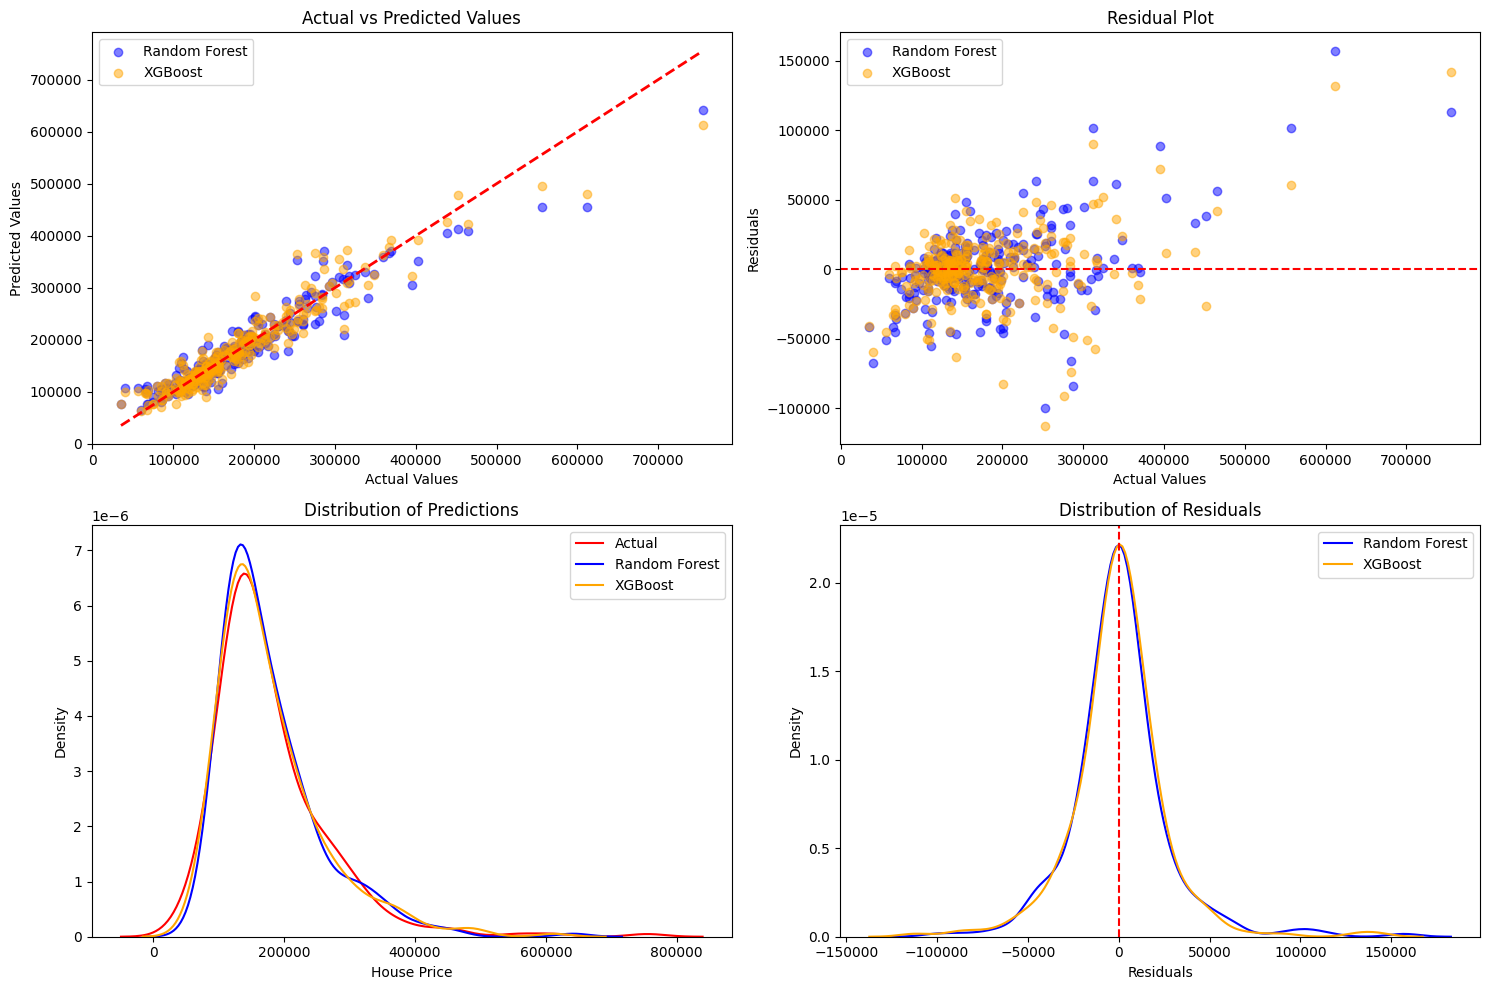

Random Forest Metrics:
RMSE: 26713.92
R² Score: 0.9070

XGBoost Metrics:
RMSE: 25928.78
R² Score: 0.9124


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Actual vs Predicted
ax1.scatter(y_valid, y_pred_rf, alpha=0.5, color='blue', label='Random Forest')
ax1.scatter(y_valid, y_pred_xgb, alpha=0.5, color='orange', label='XGBoost')
ax1.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Actual vs Predicted Values')
ax1.legend()

# 2. Residual Plots
ax2.scatter(y_valid, y_valid - y_pred_rf, alpha=0.5, color='blue', label='Random Forest')
ax2.scatter(y_valid, y_valid - y_pred_xgb, alpha=0.5, color='orange', label='XGBoost')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()

# 3. Distribution of Predictions
sns.kdeplot(data=y_valid, color='red', label='Actual', ax=ax3)
sns.kdeplot(data=y_pred_rf, color='blue', label='Random Forest', ax=ax3)
sns.kdeplot(data=y_pred_xgb, color='orange', label='XGBoost', ax=ax3)
ax3.set_xlabel('House Price')
ax3.set_ylabel('Density')
ax3.set_title('Distribution of Predictions')
ax3.legend()

# 4. Distribution of Residuals
sns.kdeplot(data=y_valid - y_pred_rf, color='blue', label='Random Forest', ax=ax4)
sns.kdeplot(data=y_valid - y_pred_xgb, color='orange', label='XGBoost', ax=ax4)
ax4.axvline(x=0, color='r', linestyle='--')
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Density')
ax4.set_title('Distribution of Residuals')
ax4.legend()

plt.tight_layout()
plt.show()

# Print comparison metrics
print("Random Forest Metrics:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")
print("\nXGBoost Metrics:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")

In [33]:
# Prepare the test data

# Feature Engineering
# 1. Age at Sale
test['AgeAtSale'] = test['YrSold'] - test['YearBuilt']
test['YearsSinceRemodel'] = test['YrSold'] - test['YearRemodAdd']

# 2. Total Bathrooms
test['TotalBaths'] = test['FullBath'] + test['HalfBath'] * 0.5 + test['BsmtFullBath'] + test['BsmtHalfBath'] * 0.5

# 3. Total Porch Area
test['TotalPorchSF'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

X_test = test[['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'GarageArea',
 'GarageCars',
 'Neighborhood',
  # Engineered features
  'AgeAtSale',
  'YearsSinceRemodel',
  'TotalBaths',
  'TotalPorchSF']]

# Ensure the test data has the same columns as the training data
common_cols = X.columns.intersection(X_test.columns)
X_test = X_test[common_cols]  # Keep only the common columns

# Automatically identify categorical columns
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns

# Apply label encoding to categorical columns
for col in categorical_columns:
    X_test[col] = label_encoder.fit_transform(X_test[col].astype(str))

# Handle missing values
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = np.nan
X_test = X_test[X.columns]

In [34]:
# make predictions
y_test_pred = rf.predict(X_test)

# Prepare the submission
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_test_pred
})

submission

,Id,SalePrice
0,1461,123583.33
1,1462,150212.50
2,1463,174849.85
3,1464,182983.00
4,1465,203294.56
...,...,...
1454,2915,85713.25
1455,2916,92051.75
1456,2917,161249.87
1457,2918,118792.75


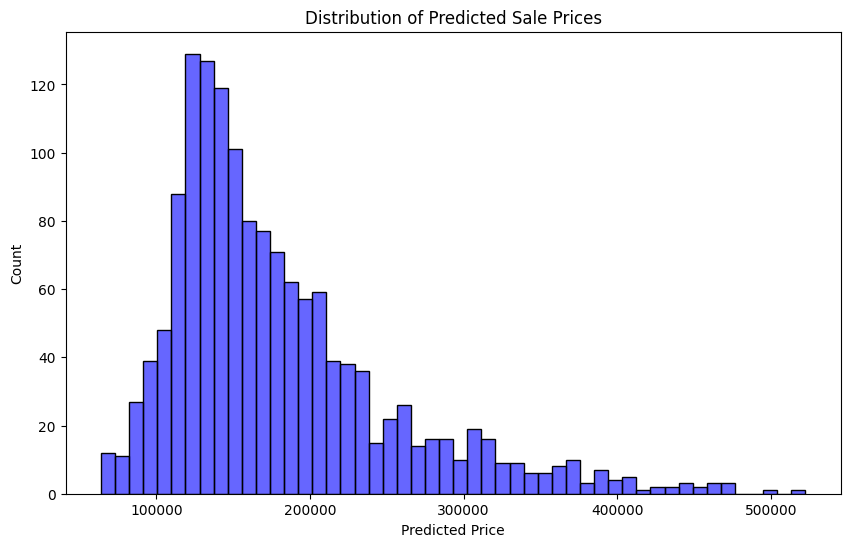


Summary Statistics of Predictions:
count      1459.000000
mean     179443.370814
std       73426.528328
min       63866.000000
25%      128940.075000
50%      158689.500000
75%      207708.740000
max      522473.060000
Name: SalePrice, dtype: float64

Count of predictions in each price range:
SalePrice
<150k        631
150k-250k    610
250k-350k    160
350k-500k     56
>500k          2
Name: count, dtype: int64


In [35]:
#Plot the prediction results from test
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=submission, x='SalePrice', bins=50, color='blue', alpha=0.6)
plt.title('Distribution of Predicted Sale Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\nSummary Statistics of Predictions:")
print(submission['SalePrice'].describe())

# Display number of predictions in different price ranges
price_ranges = [0, 150000, 250000, 350000, 500000, float('inf')]
labels = ['<150k', '150k-250k', '250k-350k', '350k-500k', '>500k']
counts = pd.cut(submission['SalePrice'], bins=price_ranges, labels=labels).value_counts().sort_index()
print("\nCount of predictions in each price range:")
print(counts)

In [36]:
#XG Boost
# Make predictions using the trained XGBoost model
y_test_pred_xgb = xgb.predict(X_test)

# Prepare the submission DataFrame
submission_xgb = pd.DataFrame({
    'Id': test['Id'],  # Ensure test dataset contains the 'Id' column
    'SalePrice': y_test_pred_xgb
})

# Save the submission to a CSV file
submission_xgb.to_csv('submission_xgb.csv', index=False)

# Display the first few rows of the submission
print(submission_xgb.head())


     Id    SalePrice
0  1461  126093.1875
1  1462  159918.1250
2  1463  180267.3750
3  1464  183043.3750
4  1465  200726.2500


In [37]:
#Adjusting to 2024 prices using The S&P CoreLogic Case-Shiller Index

# Define the adjustment factor
adjustment_factor = 2.25

# Adjust predictions for Random Forest
submission['SalePrice_2024'] = submission['SalePrice'] * adjustment_factor

# Adjust predictions for XGBoost
submission_xgb['SalePrice_2024'] = submission_xgb['SalePrice'] * adjustment_factor

# Save adjusted submissions to CSV files
submission.to_csv('submission_rf_adjusted.csv', index=False)
submission_xgb.to_csv('submission_xgb_adjusted.csv', index=False)

# Display a few rows from the adjusted predictions
print("Random Forest Adjusted Predictions:")
print(submission.head())

print("\nXGBoost Adjusted Predictions:")
print(submission_xgb.head())


Random Forest Adjusted Predictions:
     Id  SalePrice  SalePrice_2024
0  1461  123583.33     278062.4925
1  1462  150212.50     337978.1250
2  1463  174849.85     393412.1625
3  1464  182983.00     411711.7500
4  1465  203294.56     457412.7600

XGBoost Adjusted Predictions:
     Id    SalePrice  SalePrice_2024
0  1461  126093.1875    283709.68750
1  1462  159918.1250    359815.78125
2  1463  180267.3750    405601.59375
3  1464  183043.3750    411847.59375
4  1465  200726.2500    451634.06250


In [38]:
#Adjusting to 2024 prices  adjiusted regionally --- Regional Housing Price Index Data for Ames, Iowa from the FED data

# Define the adjustment factor
adjustment_factor = 2.00

# Adjust predictions for Random Forest
submission['SalePrice_2024'] = submission['SalePrice'] * adjustment_factor

# Adjust predictions for XGBoost
submission_xgb['SalePrice_2024'] = submission_xgb['SalePrice'] * adjustment_factor

# Save adjusted submissions to CSV files
submission.to_csv('submission_rf_adjusted.csv', index=False)
submission_xgb.to_csv('submission_xgb_adjusted.csv', index=False)

# Display a few rows from the adjusted predictions
print("Random Forest Adjusted Predictions:")
print(submission.head())

print("\nXGBoost Adjusted Predictions:")
print(submission_xgb.head())


Random Forest Adjusted Predictions:
     Id  SalePrice  SalePrice_2024
0  1461  123583.33       247166.66
1  1462  150212.50       300425.00
2  1463  174849.85       349699.70
3  1464  182983.00       365966.00
4  1465  203294.56       406589.12

XGBoost Adjusted Predictions:
     Id    SalePrice  SalePrice_2024
0  1461  126093.1875      252186.375
1  1462  159918.1250      319836.250
2  1463  180267.3750      360534.750
3  1464  183043.3750      366086.750
4  1465  200726.2500      401452.500


In [44]:
#submission csv
submission = submission[['Id','SalePrice']]
submission.to_csv('submission_rf.csv', index=False)